<h1> STOCK PREDICTION ANALYSIS </h1>

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10



<h1>Normalizing Data & Data Reading</h1>

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

df = pd.read_csv(r'f:/stock_price.csv')

df.head()

Date    Open    High     Low    Last   Close  Total Trade Quantity  \
0  2018-10-08  208.00  222.25  206.85  216.00  215.15             4642146.0   
1  2018-10-05  217.00  218.60  205.90  210.25  209.20             3519515.0   
2  2018-10-04  223.50  227.80  216.15  217.25  218.20             1728786.0   
3  2018-10-03  230.00  237.50  225.75  226.45  227.60             1708590.0   
4  2018-10-01  234.55  234.60  221.05  230.30  230.90             1534749.0   

   Turnover (Lacs)  
0         10062.83  
1          7407.06  
2          3815.79  
3          3960.27  
4          3486.05

<h1> DateTime Formating </h1>

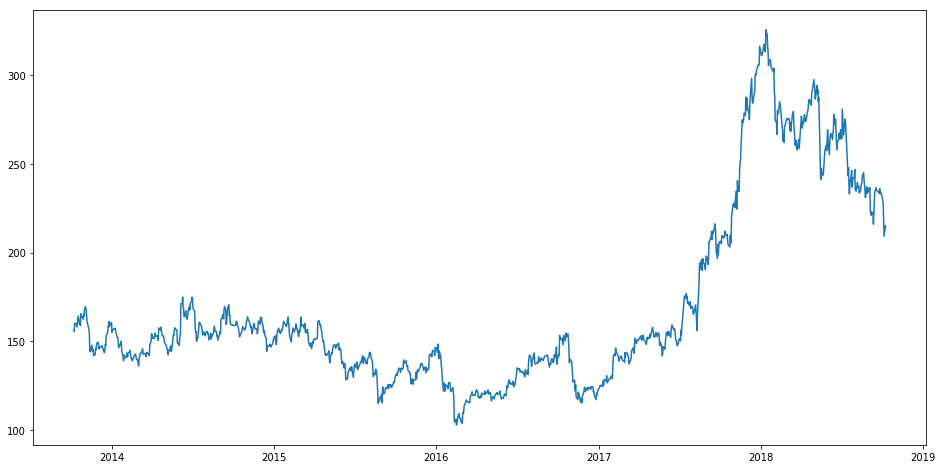

In [5]:

df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

In [10]:
#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])


for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]
    
print(new_data)

# NOTE: While splitting the data into train and validation set, we cannot use random splitting since that will destroy the time component. So here we have set the last year’s data into validation and the 4 years’ data before that into train set.

# splitting into train and validation
train = new_data[:987]
valid = new_data[987:]

# shapes of training set
print('\n Shape of training set:')
print(train.shape)

# shapes of validation set
print('\n Shape of validation set:')
print(valid.shape)

# In the next step, we will create predictions for the validation set and check the RMSE using the actual values.
# making predictions
preds = []
for i in range(0,valid.shape[0]):
    a = train['Close'][len(train)-248+i:].sum() + sum(preds)
    b = a/248
    preds.append(b)

# checking the results (RMSE value)
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)

                     Date   Close
0     2013-10-08 00:00:00   155.8
1     2013-10-09 00:00:00  155.55
2     2013-10-10 00:00:00  160.15
3     2013-10-11 00:00:00  160.05
4     2013-10-14 00:00:00  159.45
5     2013-10-15 00:00:00  158.05
6     2013-10-17 00:00:00     162
7     2013-10-18 00:00:00   164.2
8     2013-10-21 00:00:00   159.6
9     2013-10-22 00:00:00  161.85
10    2013-10-23 00:00:00  158.75
11    2013-10-24 00:00:00  165.45
12    2013-10-25 00:00:00  163.85
13    2013-10-28 00:00:00  163.25
14    2013-10-29 00:00:00   162.4
15    2013-10-30 00:00:00     165
16    2013-10-31 00:00:00     164
17    2013-11-01 00:00:00   167.7
18    2013-11-03 00:00:00   169.5
19    2013-11-05 00:00:00   167.6
20    2013-11-06 00:00:00  163.55
21    2013-11-07 00:00:00  160.35
22    2013-11-08 00:00:00   160.1
23    2013-11-11 00:00:00  156.55
24    2013-11-12 00:00:00  154.55
25    2013-11-13 00:00:00   144.3
26    2013-11-14 00:00:00  143.95
27    2013-11-18 00:00:00   147.7
28    2013-11-